In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from get_data import *

# SciKit Learn Modules
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Load Standardized Industrials Data

In [2]:
industrials_df_col_names = [
	't_ev',
	't_rev',
	'ebitda',
	'ebitda_margin',
	't_ev/t_rev',
	't_ev/ebitda',
	'est_ann_rev_gr_minus_1yr_minus_capiq',
	'est_ann_ebitda_gr_minus_1yr_minus_capiq',
	't_rev_1yr_growth',
	'ebitda_1yr_growth',
	't_rev_3_yr_cagr',
	'ebitda_3yr_cagr',
	't_rev_5yr_cagr',
	'ebitda_5yr_cagr',
	'return_on_assets',
	'return_on_equity',
	'capex_as_percent_rev',
	'ebitda/interest_exp',
	't_debt/cap_percent',
	't_debt/equity_percent'
	]

# Load Raw Data
raw_data_arrays         = get_raw_data()
raw_industrials_array   = np.split(raw_data_arrays[2], [1], axis=1)
raw_industrials_array_x = raw_industrials_array[1]
raw_industrials_array_y = raw_industrials_array[0]
raw_industrials_df      = pd.DataFrame( raw_data_arrays[2], columns=industrials_df_col_names )

# Load Standardized Data
std_data_arrays         = get_standardized_data()
std_industrials_array   = np.split(std_data_arrays[2], [1], axis=1)
std_industrials_array_x = std_industrials_array[1]
std_industrials_array_y = std_industrials_array[0]
std_industrials_df      = pd.DataFrame( std_data_arrays[2], columns=industrials_df_col_names )

# Plot Standardized Log Feature Distributions

In [3]:
# Functions to Perform Log10 Operation on Specific Feature Vectors 
features_to_transform = [0, 1, 2, 16, 17, 18, 19]

def log_basis( feature_vector ):
    return np.log10( feature_vector )

def log_transform_features(feature_matrix, features_to_transform):
    transformed_features  = []
    split_features = np.split( feature_matrix, feature_matrix.shape[1], axis=1 )
    for feature_num in list(range(len( split_features ))):
        feature = split_features[ feature_num ]
        if feature_num in features_to_transform:
            feature = log_basis( feature )
        transformed_features.append( feature )
    concat_features_array = np.concatenate( transformed_features, axis=1 )
    concat_features_array = scale(mean_fill_nan_entries( concat_features_array, is_df=False ))
    return concat_features_array

In [4]:
# Transform Raw Data Features
std_industrials_log_data = log_transform_features(raw_data_arrays[2], features_to_transform)
std_industrials_log_df   = pd.DataFrame( std_industrials_log_data, columns=industrials_df_col_names )

/Users/xinyutan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


# Split Data and Drop features

In [5]:
std_industrials_log_df.head()

,t_ev,t_rev,ebitda,ebitda_margin,t_ev/t_rev,t_ev/ebitda,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,2.167424,1.854476,2.063180,1.357549,1.633461,-0.020155,-0.082415,-0.051720,-0.200552,-0.117152,-0.146568,-0.200189,-0.409785,-0.255314,1.626267,0.088648,0.500293,1.206452,0.418197,0.410737
1,0.906905,0.581865,0.775359,0.511802,0.988805,0.083611,0.255412,0.279555,-0.074525,0.030248,-0.024472,0.321060,0.292467,0.988172,0.946064,0.054256,0.109958,1.629238,-0.745165,-0.866425
2,0.190111,-0.414144,-0.001839,0.930029,1.981141,0.239261,0.498185,0.315414,0.154147,0.005105,-0.043540,0.067022,0.105498,0.614568,2.846633,0.061770,0.668693,-0.034798,0.227465,0.101564
3,0.043199,0.346379,0.113064,-0.644362,-0.646015,-0.210394,0.155220,0.489188,-0.086488,1.158535,-0.210868,-0.657457,-0.617963,-0.966276,-0.532379,0.030109,0.594181,0.662340,-0.751357,-0.874354
4,0.366194,0.932537,0.249616,-1.023554,-0.835065,0.037493,0.058239,0.240939,-0.048694,-0.049895,-0.058469,-0.287471,-0.160306,-0.510145,-0.532379,0.031555,-0.840162,0.366363,-0.396054,-0.550410


In [6]:
std_industrials_log_df.drop(['t_ev/t_rev', 't_ev/ebitda'], axis=1, inplace=True)
std_industrials_log_df.head()

,t_ev,t_rev,ebitda,ebitda_margin,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,2.167424,1.854476,2.063180,1.357549,-0.082415,-0.051720,-0.200552,-0.117152,-0.146568,-0.200189,-0.409785,-0.255314,1.626267,0.088648,0.500293,1.206452,0.418197,0.410737
1,0.906905,0.581865,0.775359,0.511802,0.255412,0.279555,-0.074525,0.030248,-0.024472,0.321060,0.292467,0.988172,0.946064,0.054256,0.109958,1.629238,-0.745165,-0.866425
2,0.190111,-0.414144,-0.001839,0.930029,0.498185,0.315414,0.154147,0.005105,-0.043540,0.067022,0.105498,0.614568,2.846633,0.061770,0.668693,-0.034798,0.227465,0.101564
3,0.043199,0.346379,0.113064,-0.644362,0.155220,0.489188,-0.086488,1.158535,-0.210868,-0.657457,-0.617963,-0.966276,-0.532379,0.030109,0.594181,0.662340,-0.751357,-0.874354
4,0.366194,0.932537,0.249616,-1.023554,0.058239,0.240939,-0.048694,-0.049895,-0.058469,-0.287471,-0.160306,-0.510145,-0.532379,0.031555,-0.840162,0.366363,-0.396054,-0.550410


## Hold out 20 companies

In [7]:
holdout_companies = pd.read_excel('20 Companies.xlsx', na_values=['-', 'NM'] )
holdout_companies_names = holdout_companies['Target Companies'][:18]
raw_data = pd.read_excel('../data/U of M Student Data - Industrials.xlsx', 'Screening', 
                         skiprows=7, na_values=['-', 'NM'])
holdout_index = raw_data.loc[raw_data['Company Name'].isin(holdout_companies_names)].index
holdout_df = std_industrials_log_df.ix[holdout_index]

In [8]:
train_df = std_industrials_log_df.ix[~std_industrials_log_df.index.isin(holdout_index)]
print train_df.shape
print raw_data.shape

(455, 18)
(473, 25)


In [9]:
train_df.head()

,t_ev,t_rev,ebitda,ebitda_margin,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,2.167424,1.854476,2.063180,1.357549,-0.082415,-0.051720,-0.200552,-0.117152,-0.146568,-0.200189,-0.409785,-0.255314,1.626267,0.088648,0.500293,1.206452,0.418197,0.410737
2,0.190111,-0.414144,-0.001839,0.930029,0.498185,0.315414,0.154147,0.005105,-0.043540,0.067022,0.105498,0.614568,2.846633,0.061770,0.668693,-0.034798,0.227465,0.101564
3,0.043199,0.346379,0.113064,-0.644362,0.155220,0.489188,-0.086488,1.158535,-0.210868,-0.657457,-0.617963,-0.966276,-0.532379,0.030109,0.594181,0.662340,-0.751357,-0.874354
4,0.366194,0.932537,0.249616,-1.023554,0.058239,0.240939,-0.048694,-0.049895,-0.058469,-0.287471,-0.160306,-0.510145,-0.532379,0.031555,-0.840162,0.366363,-0.396054,-0.550410
5,-0.849986,-0.852301,-0.335211,1.199552,1.378076,-1.044443,0.953547,10.520336,-0.171992,0.565689,-0.402320,-0.141560,-0.987715,-0.042706,-4.731245,-0.034798,0.227465,0.101564


In [10]:
y_data = train_df['t_ev']
x_data = train_df.iloc[:, 1:]
x_data.head()

,t_rev,ebitda,ebitda_margin,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,1.854476,2.063180,1.357549,-0.082415,-0.051720,-0.200552,-0.117152,-0.146568,-0.200189,-0.409785,-0.255314,1.626267,0.088648,0.500293,1.206452,0.418197,0.410737
2,-0.414144,-0.001839,0.930029,0.498185,0.315414,0.154147,0.005105,-0.043540,0.067022,0.105498,0.614568,2.846633,0.061770,0.668693,-0.034798,0.227465,0.101564
3,0.346379,0.113064,-0.644362,0.155220,0.489188,-0.086488,1.158535,-0.210868,-0.657457,-0.617963,-0.966276,-0.532379,0.030109,0.594181,0.662340,-0.751357,-0.874354
4,0.932537,0.249616,-1.023554,0.058239,0.240939,-0.048694,-0.049895,-0.058469,-0.287471,-0.160306,-0.510145,-0.532379,0.031555,-0.840162,0.366363,-0.396054,-0.550410
5,-0.852301,-0.335211,1.199552,1.378076,-1.044443,0.953547,10.520336,-0.171992,0.565689,-0.402320,-0.141560,-0.987715,-0.042706,-4.731245,-0.034798,0.227465,0.101564


In [13]:
x_test = holdout_df.iloc[:, 1:]
y_test = holdout_df.t_ev
x_test.head()

,t_rev,ebitda,ebitda_margin,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
1,0.581865,0.775359,0.511802,0.255412,0.279555,-0.074525,0.030248,-0.024472,0.321060,0.292467,0.988172,0.946064,0.054256,0.109958,1.629238,-0.745165,-0.866425
21,0.993654,1.341696,1.552721,0.139163,0.106332,-0.059298,-0.019252,-0.048714,0.578235,0.016896,0.514197,1.206142,0.071741,1.396944,2.151137,-0.355000,-0.509512
70,1.983252,1.828370,-0.064421,-0.291790,-0.220806,-0.675162,-0.358681,-0.304287,-0.798589,-1.027482,-1.097316,-0.782454,0.021858,0.874027,0.019669,0.716061,1.027943
102,1.332328,1.782186,2.621523,0.030622,-0.044824,-0.356490,-0.151802,-0.174653,-0.255512,-0.520990,-0.374087,0.067801,0.043707,1.697198,-0.177959,0.348862,0.306238
105,0.472909,0.665979,0.456038,-0.352805,-0.010897,-0.256973,-0.080774,-0.132392,-0.111746,-0.336113,0.022937,0.153827,0.043418,-0.343600,0.204798,0.232730,0.142704


# OLS Regression

In [18]:
ols_model = LinearRegression()
scores = cross_val_score(ols_model, x_data, y_data, scoring='neg_mean_squared_error', cv=5)
# print('MSEs:', scores*-1)
print("Average MSE: %0.4f (+/- %0.4f)" % (-scores.mean(), scores.std()))

Average MSE: 0.2153 (+/- 0.0994)


# Lasso Regression 

In [14]:
lasso_model = Lasso()
alphas         = [ 1e-5, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 1, 10, 100 ]
lasso_mses     = []
lasso_avg_mses = []
lasso_std_mses = []

for alpha in alphas:
    lasso_model.alpha = alpha
    scores = cross_val_score(lasso_model, x_data, y_data, scoring='neg_mean_squared_error', cv=5)
    lasso_mses.append( scores*-1 )
    lasso_avg_mses.append( -scores.mean() )
    lasso_std_mses.append( scores.std() )

# Plot Hyperparameter Selection
#plt.semilogx( alphas, lasso_avg_mses )
#plt.title('Lasso - MSE vs Alpha')
#plt.xlabel('Alpha')
#plt.ylabel('MSE')

# print('MSEs (alpha = 1e-2):', lasso_mses[3]*-1)
print("Average MSE (alpha = 1e-2): %0.4f (+/- %0.4f)" % (lasso_avg_mses[3], lasso_std_mses[3]))

Average MSE (alpha = 1e-2): 0.2083 (+/- 0.1012)


In [15]:
lasso_model.alpha = 1e-2
lasso_model.fit(x_data, y_data)
yhat_lasso = lasso_model.predict(x_test)
print 'Finished!'

Finished!


# Ridge Regression

In [16]:
ridge_model = Ridge()
alphas         = [ 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100 ]
ridge_mses     = []
ridge_avg_mses = []
ridge_std_mses = []

for alpha in alphas:
    ridge_model.alpha = alpha
    scores = cross_val_score(ridge_model, x_data, y_data, scoring='neg_mean_squared_error', cv=5)
    ridge_mses.append( scores*-1 )
    ridge_avg_mses.append( -scores.mean() )
    ridge_std_mses.append( scores.std() )

# Plot Hyperparameter Selection
#plt.semilogx( alphas, ridge_avg_mses )
#plt.title('Ridge - MSE vs Alpha')
#plt.xlabel('Alpha')
#plt.ylabel('MSE')

# print('MSEs (alpha = 1e-2):', lasso_mses[3]*-1)
print("Average MSE (alpha = 1e-2): %0.4f (+/- %0.4f)" % (ridge_avg_mses[6], ridge_std_mses[6]))

Average MSE (alpha = 1e-2): 0.2039 (+/- 0.0929)


In [17]:
ridge_model.alpha = 1e-2
ridge_model.fit(x_data, y_data)
yhat_ridge = ridge_model.predict(x_test)
print 'Finished!'

Finished!


# Random Forest Classifier

In [20]:
# basic model 
model = RandomForestRegressor()
scores = cross_val_score(model, x_data, y_data, scoring='neg_mean_squared_error', cv=5)
# print('MSEs:', scores*-1)
print("Average MSE: %0.4f (+/- %0.4f)" % (-scores.mean(), scores.std()))

Average MSE: 0.2214 (+/- 0.1340)


In [36]:
from sklearn.ensemble import RandomForestRegressor
from itertools import product
n_estimators_params = [10, 20]
max_features_params = ['auto', 'sqrt', "log2"]
min_samples_split_params = [2]
min_samples_leaf_params = [  2]

result_dict = {}
for param in product(n_estimators_params, max_features_params, min_samples_split_params, min_samples_leaf_params):
    rf_model = RandomForestRegressor(n_estimators=param[0], max_features=param[1],
                                min_samples_split=param[2], min_samples_leaf=param[3], 
                                 random_state=1711, n_jobs=-1)
    scores = cross_val_score(rf_model, x_data, y_data, scoring='neg_mean_squared_error', cv=5)
    result_dict[param] = (-scores.mean(), scores.std())
    print 'current param: n_estimators_params, max_features_params, min_samples_split_params, min_samples_leaf_params'
    print param
    print 'mse mean and std: ',  -scores.mean(), scores.std()

current param: n_estimators_params, max_features_params, min_samples_split_params, min_samples_leaf_params
(10, 'auto', 2, 2)
mse mean and std:  0.23134456197 0.153749377584
current param: n_estimators_params, max_features_params, min_samples_split_params, min_samples_leaf_params
(10, 'sqrt', 2, 2)
mse mean and std:  0.217878513076 0.139053975999
current param: n_estimators_params, max_features_params, min_samples_split_params, min_samples_leaf_params
(10, 'log2', 2, 2)
mse mean and std:  0.217878513076 0.139053975999
current param: n_estimators_params, max_features_params, min_samples_split_params, min_samples_leaf_params
(20, 'auto', 2, 2)
mse mean and std:  0.224468122662 0.151168747309
current param: n_estimators_params, max_features_params, min_samples_split_params, min_samples_leaf_params
(20, 'sqrt', 2, 2)
mse mean and std:  0.205373059319 0.125319452074
current param: n_estimators_params, max_features_params, min_samples_split_params, min_samples_leaf_params
(20, 'log2', 2, 2)


In [21]:
min_mse = 100
min_param = ()
for param in result_dict:
    if result_dict[param][0] < min_mse:
        min_mse=result_dict[param][0]
        min_param = param
print result_dict[min_param], min_param

NameError: name 'result_dict' is not defined

In [22]:
rf_model = RandomForestRegressor(n_estimators=20, max_features='sqrt',
                                min_samples_split=2, min_samples_leaf=2,random_state=1711, n_jobs=-1)
rf_model.fit(x_data, y_data)
yhat_rf = rf_model.predict(x_test)
print 'Finished!'

Finished!


## Go back to unstandarized data

<b> Michael Data Recovery</b>


In [23]:
data_set = load_data_frames()
industrial_raw = data_set[2]
mean_filled_na_industrial = mean_fill_nan_entries(industrial_raw)

In [24]:
mean_industrial_df = pd.DataFrame(mean_filled_na_industrial, columns=industrials_df_col_names )
mean_industrial_df.head()

,t_ev,t_rev,ebitda,ebitda_margin,t_ev/t_rev,t_ev/ebitda,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,117144.9,30109.0,8676.3,28.80,3.890,13.5,1.06,5.309605,-0.545,2.14,-0.83,2.580,0.334,3.20,13.80,45.80,4.720,43.600000,53.000000,112.600000
1,7892.2,2627.2,517.5,19.70,3.000,15.3,6.32,14.800000,4.090,20.90,7.43,19.200,10.400,25.50,10.40,22.00,2.870,72.900000,14.700000,17.300000
2,1702.2,389.5,94.4,24.20,4.370,18.0,10.10,16.100000,12.500,17.70,6.14,11.100,7.720,18.80,19.90,27.20,5.850,23.685012,46.270344,176.257816
3,1243.0,1673.0,121.4,7.26,0.743,10.2,4.76,22.400000,3.650,164.50,-5.18,-12.000,-2.650,-9.55,3.01,5.29,5.320,22.500000,14.600000,17.100000
4,2481.2,5144.7,163.7,3.18,0.482,14.5,3.25,13.400000,5.040,10.70,5.13,-0.203,3.910,-1.37,3.01,6.29,0.855,15.700000,21.600000,27.500000


In [25]:
mean_tev = np.mean(mean_industrial_df['t_ev'])
std_tev = np.std(mean_industrial_df['t_ev'])
print mean_tev, std_tev
mean_ebitda = np.mean(mean_industrial_df['ebitda'])
std_ebitda = np.std(mean_industrial_df['ebitda'])
print mean_ebitda, std_ebitda

6882.03773922 24313.4761283
572.919179704 1557.56049375


In [26]:
log_mean_tev = np.mean(log_basis(mean_industrial_df['t_ev']))
log_std_tev = np.std(log_basis(mean_industrial_df['t_ev']))
print log_mean_tev, log_std_tev
log_mean_ebitda = np.mean(log_basis(mean_industrial_df['ebitda']))
log_std_ebitda = np.std(log_basis(mean_industrial_df['ebitda']))
print log_mean_ebitda, log_std_ebitda

3.06717349192 0.935453344737
1.9767206397 0.951778662612


/Users/xinyutan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


In [27]:
michael_scale_ebitda = (log_basis(mean_industrial_df['ebitda']) - log_mean_ebitda)/log_std_ebitda
print(np.mean(michael_scale_ebitda))
print(np.std(michael_scale_ebitda))

2.27113525726e-15
1.0


/Users/xinyutan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


## TEV/EBITDA

In [28]:
ridge_pred_tev = 10**((yhat_ridge*log_std_tev)+log_mean_tev)
lasso_pred_tev = 10 **((yhat_lasso*log_std_tev)+log_mean_tev)
rf_pred_tev = 10**((yhat_rf*log_std_tev)+log_mean_tev)

original_ebitda = 10**((x_test.ebitda*log_std_ebitda)+log_mean_ebitda)

In [29]:
ridge_multiple = ridge_pred_tev/original_ebitda
lasso_multiple = lasso_pred_tev/original_ebitda
rf_multiple = rf_pred_tev/original_ebitda

rf_multiple.index = raw_data.ix[holdout_index, 'Company Name']
lasso_multiple.index = raw_data.ix[holdout_index, 'Company Name']
ridge_multiple.index = raw_data.ix[holdout_index, 'Company Name']

In [30]:
# real value and derek's approach
market_approach = pd.read_excel('20_companies_derek.xlsx', na_values=['-', 'NM'] )
market_approach = market_approach.iloc[:, :3]
market_approach = market_approach.set_index('Target Companies')
market_approach = market_approach.ix[raw_data.ix[holdout_index, 'Company Name']]
market_approach.head(3)

,Predicted EV/EBITDA,Actual EV/EBITDA
Target Companies,,
A. O. Smith Corporation (NYSE:AOS),14.598,15.30
"Alaska Air Group, Inc. (NYSE:ALK)",5.770,5.51
Caterpillar Inc. (NYSE:CAT),13.770,16.20


In [32]:
# calculate the se for each company
rf_se = (rf_multiple - market_approach['Actual EV/EBITDA'])**2
lasso_se = (lasso_multiple - market_approach['Actual EV/EBITDA'])**2
ridge_se = (ridge_multiple - market_approach['Actual EV/EBITDA'])**2
market_se = (market_approach['Predicted EV/EBITDA'] - market_approach['Actual EV/EBITDA'])**2

In [33]:
rf_se

Company Name
A. O. Smith Corporation (NYSE:AOS)                10.179522
Alaska Air Group, Inc. (NYSE:ALK)                  3.442089
Caterpillar Inc. (NYSE:CAT)                      177.880103
CSX Corporation (NasdaqGS:CSX)                     7.295694
Curtiss-Wright Corporation (NYSE:CW)               4.863148
Deere & Company (NYSE:DE)                        135.063203
Delta Air Lines, Inc. (NYSE:DAL)                   1.632926
FedEx Corporation (NYSE:FDX)                       8.052310
General Dynamics Corporation (NYSE:GD)            42.486901
JetBlue Airways Corporation (NasdaqGS:JBLU)        9.481464
Lockheed Martin Corporation (NYSE:LMT)            29.176512
Northrop Grumman Corporation (NYSE:NOC)           26.795398
Raytheon Company (NYSE:RTN)                       21.033705
Republic Airways Holdings Inc. (OTCPK:RJET.Q)      2.744857
Ryder System, Inc. (NYSE:R)                        9.731073
Southwest Airlines Co. (NYSE:LUV)                  0.909880
Spirit Airlines, Inc. (Nasd

In [110]:
result_df = pd.DataFrame({'Method': ['RandomForest']*len(rf_se) + ['Lasso']*len(lasso_se) +\
                          ['Ridge']*len(ridge_se) + ['MarketApproach']*len(market_se), 
                         'Error': np.concatenate((rf_se.values, lasso_se.values, ridge_se.values, market_se.values))})

In [114]:
rf_se

Company Name
A. O. Smith Corporation (NYSE:AOS)                10.179522
Alaska Air Group, Inc. (NYSE:ALK)                  3.442089
Caterpillar Inc. (NYSE:CAT)                      177.880103
CSX Corporation (NasdaqGS:CSX)                     7.295694
Curtiss-Wright Corporation (NYSE:CW)               4.863148
Deere & Company (NYSE:DE)                        135.063203
Delta Air Lines, Inc. (NYSE:DAL)                   1.632926
FedEx Corporation (NYSE:FDX)                       8.052310
General Dynamics Corporation (NYSE:GD)            42.486901
JetBlue Airways Corporation (NasdaqGS:JBLU)        9.481464
Lockheed Martin Corporation (NYSE:LMT)            29.176512
Northrop Grumman Corporation (NYSE:NOC)           26.795398
Raytheon Company (NYSE:RTN)                       21.033705
Republic Airways Holdings Inc. (OTCPK:RJET.Q)      2.744857
Ryder System, Inc. (NYSE:R)                        9.731073
Southwest Airlines Co. (NYSE:LUV)                  0.909880
Spirit Airlines, Inc. (Nasd

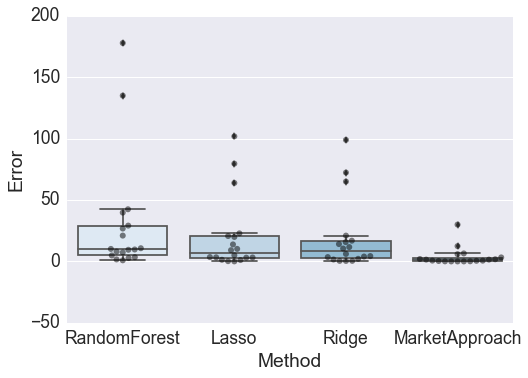

In [136]:
sns.set(font_scale=1.75)
fig_size = (6, 5)
sns.boxplot(x='Method', y='Error', data=result_df, palette=sns.color_palette("Blues"))
sns.swarmplot(x="Method", y="Error", data=result_df, 
              color=sns.light_palette("black")[-1], size=6, alpha=0.5)